In [1]:
pip install snowflake-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install "snowflake-connector-python[pandas]"

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install snowflake-sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import getpass
%matplotlib inline
import snowflake.connector

C:\Users\dell\AppData\Local\Temp\ipykernel_8416\482731079.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


**CONNECTING TO SNOWFLAKE**

In [5]:
conn = snowflake.connector.connect(
       user = 'TARUSHI',
       password = getpass.getpass('Your Snowflake Password: '),
       account = 'novuzjq-sr93796',
       database = 'RETAILS',
       schema = 'PUBLIC',
       warehouse = 'COMPUTE_WH')

Your Snowflake Password: ········


In [6]:
cur = conn.cursor()

In [7]:
select_demographic_RAW = 'SELECT * FROM demographic_RAW'
select_CAMPAIGN_DESC_RAW = 'SELECT * FROM CAMPAIGN_DESC_RAW'
select_CAMPAIGN_RAW = 'SELECT * FROM CAMPAIGN_RAW'
select_PRODUCT_RAW = 'SELECT * FROM PRODUCT_RAW'
select_COUPON_RAW = 'SELECT * FROM COUPON_RAW'
select_COUPON_REDEMPT_RAW = 'SELECT * FROM COUPON_REDEMPT_RAW'
select_TRANSACTION_RAW = 'SELECT * FROM TRANSACTION_RAW'

In [8]:
cur.execute(select_demographic_RAW)
demographic_RAW = cur.fetch_pandas_all()

In [9]:
cur.execute(select_CAMPAIGN_DESC_RAW)
CAMPAIGN_DESC_RAW = cur.fetch_pandas_all()

In [10]:
cur.execute(select_CAMPAIGN_RAW)
CAMPAIGN_RAW = cur.fetch_pandas_all()

In [11]:
cur.execute(select_PRODUCT_RAW)
PRODUCT_RAW = cur.fetch_pandas_all()

In [12]:
cur.execute(select_COUPON_RAW)
COUPON_RAW = cur.fetch_pandas_all()

In [13]:
cur.execute(select_COUPON_REDEMPT_RAW)
COUPON_REDEMPT_RAW = cur.fetch_pandas_all()

In [14]:
cur.execute(select_TRANSACTION_RAW)
TRANSACTION_RAW = cur.fetch_pandas_all()

In [15]:
cur.close()
conn.close()

In [16]:
demographic_RAW.head(5)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,HOUSEHOLD_KEY
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [17]:
CAMPAIGN_DESC_RAW.head(5)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [18]:
CAMPAIGN_RAW.head(5)

,DESCRIPTION,HOUSEHOLD_KEY,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [19]:
PRODUCT_RAW.head(5)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [20]:
COUPON_RAW.head(5)

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [21]:
COUPON_REDEMPT_RAW.head(5)

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [22]:
TRANSACTION_RAW.head(5)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0


In [23]:
demographic_RAW.shape

(2500, 8)

In [24]:
CAMPAIGN_DESC_RAW.shape

(30, 4)

In [25]:
CAMPAIGN_RAW.shape

(7208, 3)

In [26]:
PRODUCT_RAW.shape

(92353, 7)

In [27]:
COUPON_RAW.shape

(124548, 3)

In [28]:
COUPON_REDEMPT_RAW.shape

(2318, 4)

In [29]:
TRANSACTION_RAW.shape

(450416, 12)

In [30]:
demographic_RAW.isnull().sum()

AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
HOUSEHOLD_KEY          0
dtype: int64

In [31]:
demographic_RAW.describe()

,HOUSEHOLD_KEY
count,2500.00000
mean,1250.50000
std,721.83216
min,1.00000
25%,625.75000
50%,1250.50000
75%,1875.25000
max,2500.00000


In [32]:
CAMPAIGN_DESC_RAW.isnull().sum()

DESCRIPTION    0
CAMPAIGN       0
START_DAY      0
END_DAY        0
dtype: int64

In [33]:
CAMPAIGN_DESC_RAW.describe()

,CAMPAIGN,START_DAY,END_DAY
count,30.000000,30.000000,30.000000
mean,15.500000,463.866667,510.466667
std,8.803408,134.488490,137.730555
min,1.000000,224.000000,264.000000
25%,8.250000,360.000000,405.750000
50%,15.500000,470.000000,502.000000
75%,22.750000,584.000000,640.250000
max,30.000000,659.000000,719.000000


In [34]:
CAMPAIGN_RAW.isnull().sum()

DESCRIPTION      0
HOUSEHOLD_KEY    0
CAMPAIGN         0
dtype: int64

In [35]:
CAMPAIGN_RAW.describe()

,HOUSEHOLD_KEY,CAMPAIGN
count,7208.000000,7208.000000
mean,1268.696726,15.659545
std,731.936391,6.949705
min,1.000000,1.000000
25%,644.000000,9.000000
50%,1263.000000,14.000000
75%,1924.000000,20.000000
max,2500.000000,30.000000


In [36]:
PRODUCT_RAW.isnull().sum()

PRODUCT_ID              0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

In [37]:
PRODUCT_RAW.describe()

,PRODUCT_ID,MANUFACTURER
count,9.235300e+04,92353.00000
mean,5.328353e+06,1739.22833
std,5.359937e+06,1818.26957
min,2.567100e+04,1.00000
25%,9.706280e+05,328.00000
50%,1.621091e+06,1094.00000
75%,9.704770e+06,2264.00000
max,1.831630e+07,6477.00000


In [38]:
COUPON_RAW.isnull().sum()

COUPON_UPC    0
PRODUCT_ID    0
CAMPAIGN      0
dtype: int64

In [39]:
COUPON_RAW.describe()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
count,1.245480e+05,1.245480e+05,124548.000000
mean,2.198225e+10,4.651277e+06,15.855935
std,1.961641e+10,4.843450e+06,6.015524
min,1.000009e+10,2.567100e+04,1.000000
25%,1.000009e+10,9.593030e+05,13.000000
50%,1.000009e+10,1.411451e+06,14.000000
75%,5.111108e+10,8.357538e+06,18.000000
max,5.998660e+10,1.814854e+07,30.000000


In [40]:
COUPON_REDEMPT_RAW.isnull().sum()

HOUSEHOLD_KEY    0
DAY              0
COUPON_UPC       0
CAMPAIGN         0
dtype: int64

In [41]:
COUPON_REDEMPT_RAW.describe()

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
count,2318.000000,2318.000000,2.318000e+03,2318.000000
mean,1302.816652,528.217429,4.123049e+10,15.551337
std,783.002545,100.360985,1.986068e+10,5.716636
min,1.000000,225.000000,1.000009e+10,1.000000
25%,588.000000,458.250000,1.000009e+10,13.000000
50%,1396.500000,532.000000,5.234003e+10,14.000000
75%,2004.000000,605.000000,5.430002e+10,18.000000
max,2500.000000,704.000000,5.897850e+10,30.000000


In [42]:
TRANSACTION_RAW.isnull().sum()

HOUSEHOLD_KEY        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [43]:
TRANSACTION_RAW.describe()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,450416.00000,4.504160e+05,450416.000000,4.504160e+05,450416.000000,450416.000000,450416.000000,450416.000000,450416.000000,450416.000000,450416.000000,450416.000000
mean,1259.55822,2.840143e+10,112.470718,2.209464e+06,86.522561,3.018436,2586.661648,-0.552774,1583.582364,16.754487,-0.014860,-0.001920
std,728.10869,5.792110e+08,42.064258,2.726512e+06,1058.788785,3.860427,7996.435988,1.186736,415.130098,6.018864,0.195378,0.044335
min,1.00000,2.698485e+10,1.000000,2.567100e+04,0.000000,0.000000,1.000000,-75.000000,0.000000,1.000000,-17.000000,-3.000000
25%,641.00000,2.798531e+10,84.000000,9.118780e+05,1.000000,1.250000,330.000000,-0.740000,1317.000000,13.000000,0.000000,0.000000
50%,1234.00000,2.839168e+10,117.000000,1.016800e+06,1.000000,2.000000,369.000000,-0.090000,1630.000000,17.000000,0.000000,0.000000
75%,1914.00000,2.886773e+10,147.000000,1.115360e+06,1.000000,3.390000,421.000000,0.000000,1906.000000,22.000000,0.000000,0.000000
max,2500.00000,2.933965e+10,176.000000,1.260019e+07,51912.000000,400.000000,32124.000000,0.000000,2359.000000,26.000000,0.000000,0.000000


**DATA MODIFICATION**

In [44]:
from datetime import datetime, timedelta

In [45]:
start_date = pd.to_datetime('2020-01-01')

In [46]:
start_date

Timestamp('2020-01-01 00:00:00')

In [47]:
TRANSACTION_RAW['DATE'] = start_date + pd.to_timedelta(TRANSACTION_RAW['DAY'], unit = 'D')

In [48]:
TRANSACTION_RAW.head(10)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,DATE
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2020-01-02
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2020-01-02
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2020-01-02
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2020-01-02
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2020-01-02
5,2375,26984851516,1,826249,2,1.98,364,-0.60,1642,1,0,0,2020-01-02
6,2375,26984851516,1,1043142,1,1.57,364,-0.68,1642,1,0,0,2020-01-02
7,2375,26984851516,1,1085983,1,2.99,364,-0.40,1642,1,0,0,2020-01-02
8,2375,26984851516,1,1102651,1,1.89,364,0.00,1642,1,0,0,2020-01-02
9,2375,26984851516,1,6423775,1,2.00,364,-0.79,1642,1,0,0,2020-01-02


In [49]:
CAMPAIGN_DESC_RAW['Start_Date'] = start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['START_DAY'], unit = 'D')

In [50]:
CAMPAIGN_DESC_RAW['End_Date'] = start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['END_DAY'], unit = 'D')

In [51]:
CAMPAIGN_DESC_RAW['CAMPAIGN_DURATION'] = CAMPAIGN_DESC_RAW['END_DAY'] - CAMPAIGN_DESC_RAW['START_DAY']

In [52]:
CAMPAIGN_DESC_RAW.head(10)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_Date,End_Date,CAMPAIGN_DURATION
0,TypeB,24,659,719,2021-10-21,2021-12-20,60
1,TypeC,15,547,708,2021-07-01,2021-12-09,161
2,TypeB,25,659,691,2021-10-21,2021-11-22,32
3,TypeC,20,615,685,2021-09-07,2021-11-16,70
4,TypeB,23,646,684,2021-10-08,2021-11-15,38
5,TypeB,21,624,656,2021-09-16,2021-10-18,32
6,TypeB,22,624,656,2021-09-16,2021-10-18,32
7,TypeA,18,587,642,2021-08-10,2021-10-04,55
8,TypeB,19,603,635,2021-08-26,2021-09-27,32
9,TypeB,17,575,607,2021-07-29,2021-08-30,32


In [53]:
COUPON_REDEMPT_RAW['DATE'] = start_date + pd.to_timedelta(COUPON_REDEMPT_RAW['DAY'], unit ='D')

In [54]:
COUPON_REDEMPT_RAW.head(10)

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN,DATE
0,1,421,10000085364,8,2021-02-25
1,1,421,51700010076,8,2021-02-25
2,1,427,54200000033,8,2021-03-03
3,1,597,10000085476,18,2021-08-20
4,1,597,54200029176,18,2021-08-20
5,8,422,53600000078,8,2021-02-26
6,13,396,53700048182,5,2021-01-31
7,13,424,10000085364,8,2021-02-28
8,13,434,53600000078,8,2021-03-10
9,13,447,52370020076,8,2021-03-23


In [55]:
TRANSACTION_RAW['DATE'].max()

Timestamp('2020-06-25 00:00:00')

In [56]:
CAMPAIGN_DESC_RAW['End_Date'].max()

Timestamp('2021-12-20 00:00:00')

In [57]:
COUPON_REDEMPT_RAW['DATE'].max()

Timestamp('2021-12-05 00:00:00')

**UNDERSTANDING THE DATA**

In [58]:
demographic_RAW['AGE_DESC'].value_counts()

45-54    901
35-44    594
25-34    445
65+      230
55-64    187
19-24    143
Name: AGE_DESC, dtype: int64

Maximum people where from age group 45-54

In [59]:
demographic_RAW['HOUSEHOLD_SIZE_DESC'].value_counts()

2     1004
1      783
3      338
5+     206
4      169
Name: HOUSEHOLD_SIZE_DESC, dtype: int64

Maximum household have 2 people 

In [60]:
CAMPAIGN_DESC_RAW['CAMPAIGN_DURATION'].median()

37.5

On an average campaign runs for 37.5 days

<Axes: xlabel='CAMPAIGN', ylabel='CAMPAIGN_DURATION'>

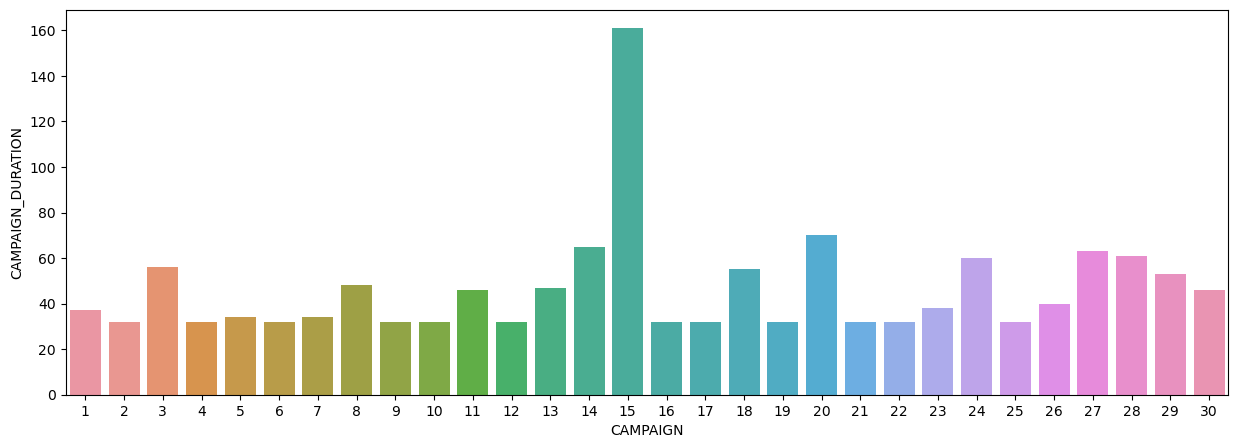

In [61]:
plt.figure(figsize = (15,5))
sns.barplot(x = CAMPAIGN_DESC_RAW['CAMPAIGN'], y = CAMPAIGN_DESC_RAW['CAMPAIGN_DURATION'])

**CAMPAIGN 15 RAN FOR MAXIMUM NUMBER OF DAYS i.e. 160**

In [62]:
CAMPAIGN_DESC_RAW.groupby('DESCRIPTION').aggregate({'CAMPAIGN':'count', 'CAMPAIGN_DURATION': 'mean'})

,CAMPAIGN,CAMPAIGN_DURATION
DESCRIPTION,,
TypeA,5,47.200000
TypeB,19,37.631579
TypeC,6,74.500000


**Amongst total of 30 campaign, 19 belong to TypeB with average duration og 47.2 days, 5 to TypeA with average duration of 37.6 days and 6 to TypeC with average duration of 74.5 days**

In [63]:
CAMPAIGN_DESC_RAW['Start_month'] = CAMPAIGN_DESC_RAW['Start_Date'].dt.strftime('%m')

In [64]:
CAMPAIGN_DESC_RAW['End_month'] = CAMPAIGN_DESC_RAW['End_Date'].dt.strftime('%m')

In [65]:
CAMPAIGN_DESC_RAW['Start_year'] = CAMPAIGN_DESC_RAW['Start_Date'].dt.strftime('%y')

In [66]:
CAMPAIGN_DESC_RAW['End_year'] = CAMPAIGN_DESC_RAW['End_Date'].dt.strftime('%y')

In [67]:
CAMPAIGN_DESC_RAW.head(10)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_Date,End_Date,CAMPAIGN_DURATION,Start_month,End_month,Start_year,End_year
0,TypeB,24,659,719,2021-10-21,2021-12-20,60,10,12,21,21
1,TypeC,15,547,708,2021-07-01,2021-12-09,161,07,12,21,21
2,TypeB,25,659,691,2021-10-21,2021-11-22,32,10,11,21,21
3,TypeC,20,615,685,2021-09-07,2021-11-16,70,09,11,21,21
4,TypeB,23,646,684,2021-10-08,2021-11-15,38,10,11,21,21
5,TypeB,21,624,656,2021-09-16,2021-10-18,32,09,10,21,21
6,TypeB,22,624,656,2021-09-16,2021-10-18,32,09,10,21,21
7,TypeA,18,587,642,2021-08-10,2021-10-04,55,08,10,21,21
8,TypeB,19,603,635,2021-08-26,2021-09-27,32,08,09,21,21
9,TypeB,17,575,607,2021-07-29,2021-08-30,32,07,08,21,21


In [68]:
CAMPAIGN_RAW['HOUSEHOLD_KEY'].nunique()

1584

**THERE ARE TOTAL 2500 HOUSEHOLD OUT OF WHICH ONLY 1584 HOUSEHOLDS PARTICIPATED IN CAMPAIGN, REST 916 DIDNOT PARTICIPATE IN ANY CAMPAIGN**

In [69]:
CAMPAIGN_RAW.groupby('HOUSEHOLD_KEY').aggregate({'CAMPAIGN': 'count'})

,CAMPAIGN
HOUSEHOLD_KEY,
1,8
2,1
3,3
4,1
6,4
...,...
2496,5
2497,3
2498,6


<Axes: xlabel='CAMPAIGN'>

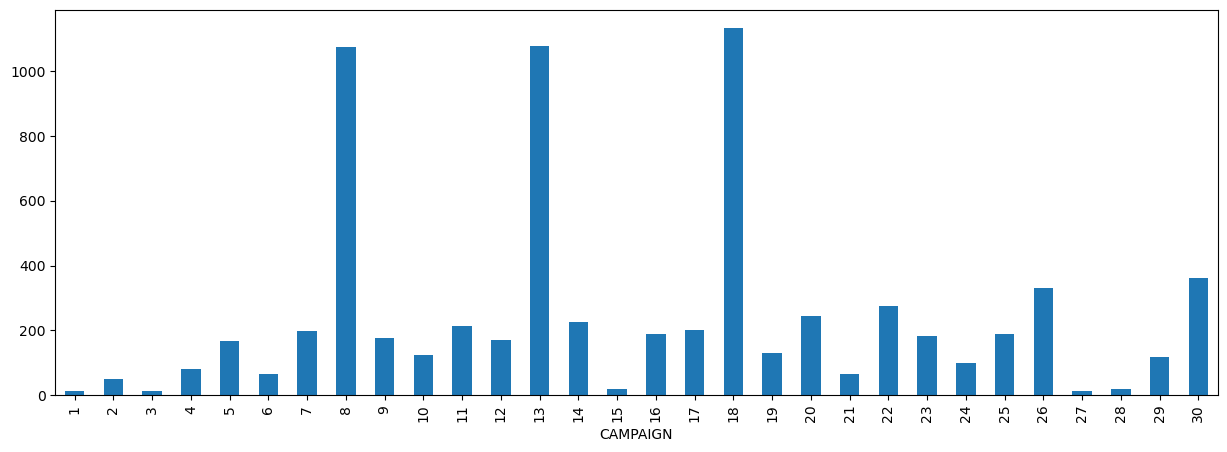

In [70]:
plt.figure(figsize= (15,5))
CAMPAIGN_RAW.groupby('CAMPAIGN')['HOUSEHOLD_KEY'].count().plot.bar()

In campaign 18 maximum number of households have participated

In [71]:
coupon_given = COUPON_RAW.groupby('CAMPAIGN').aggregate(TOTAL_PRODUCT = ('PRODUCT_ID', 'nunique'),
                                                          TOATL_COUPN_GIVEN= ('COUPON_UPC', 'nunique'))

In [72]:
coupon_given.sort_values(by= 'TOTAL_PRODUCT', ascending = False).head(10)

,TOTAL_PRODUCT,TOATL_COUPN_GIVEN
CAMPAIGN,,
13,35616,207
18,35513,209
8,17178,209
26,3396,181
30,3205,181
22,1917,21
24,1887,2
16,1025,13
25,826,17


In [73]:
coupon_given = coupon_given.merge(right = CAMPAIGN_DESC_RAW, on = 'CAMPAIGN', how = 'left')

In [74]:
coupon_given.head(10)

,CAMPAIGN,TOTAL_PRODUCT,TOATL_COUPN_GIVEN,DESCRIPTION,START_DAY,END_DAY,Start_Date,End_Date,CAMPAIGN_DURATION,Start_month,End_month,Start_year,End_year
0,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,01,20,21
1,2,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,01,20,21
2,3,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,02,20,21
3,4,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,01,02,21,21
4,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,01,02,21,21
5,6,18,1,TypeC,393,425,2021-01-28,2021-03-01,32,01,03,21,21
6,7,259,8,TypeB,398,432,2021-02-02,2021-03-08,34,02,03,21,21
7,8,17178,209,TypeA,412,460,2021-02-16,2021-04-05,48,02,04,21,21
8,9,825,18,TypeB,435,467,2021-03-11,2021-04-12,32,03,04,21,21
9,10,393,14,TypeB,463,495,2021-04-08,2021-05-10,32,04,05,21,21


In [75]:
coupon_given.loc[:, ('CAMPAIGN', 'TOTAL_PRODUCT', 'TOATL_COUPN_GIVEN', 'START_DAY', 'END_DAY', 'Start_Date', 'End_Date', 'Start_month', 'End_month', 'Start_year', 'End_year','CAMPAIGN_DURATION')].sort_values(by = 'TOTAL_PRODUCT', ascending = False).head(10)

,CAMPAIGN,TOTAL_PRODUCT,TOATL_COUPN_GIVEN,START_DAY,END_DAY,Start_Date,End_Date,Start_month,End_month,Start_year,End_year,CAMPAIGN_DURATION
12,13,35616,207,504,551,2021-05-19,2021-07-05,05,07,21,21,47
17,18,35513,209,587,642,2021-08-10,2021-10-04,08,10,21,21,55
7,8,17178,209,412,460,2021-02-16,2021-04-05,02,04,21,21,48
25,26,3396,181,224,264,2020-08-12,2020-09-21,08,09,20,20,40
29,30,3205,181,323,369,2020-11-19,2021-01-04,11,01,20,21,46
21,22,1917,21,624,656,2021-09-16,2021-10-18,09,10,21,21,32
23,24,1887,2,659,719,2021-10-21,2021-12-20,10,12,21,21,60
15,16,1025,13,561,593,2021-07-15,2021-08-16,07,08,21,21,32
24,25,826,17,659,691,2021-10-21,2021-11-22,10,11,21,21,32
8,9,825,18,435,467,2021-03-11,2021-04-12,03,04,21,21,32


Campaign 13, 18 and 8 had maximum number of products

In [76]:
COUPON_RAW.columns

Index(['COUPON_UPC', 'PRODUCT_ID', 'CAMPAIGN'], dtype='object')

In [77]:
PRODUCT_RAW.columns

Index(['PRODUCT_ID', 'MANUFACTURER', 'DEPARTMENT', 'BRAND', 'COMMODITY_DESC',
       'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT'],
      dtype='object')

In [78]:
coupon_product = COUPON_RAW.merge(right = PRODUCT_RAW, on = 'PRODUCT_ID', how = 'left')

In [79]:
coupon_product.head(10)

,COUPON_UPC,PRODUCT_ID,CAMPAIGN,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,10000089061,27160,4,69,GROCERY,Private,SHORTENING/OIL,VEGETABLE/SALAD OIL,48 OZ
1,10000089064,27754,9,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ
2,10000089073,28897,12,69,GROCERY,Private,EGGS,EGGS - X-LARGE,A D 1 DZ
3,51800009050,28919,28,236,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED COOKIES-CHUB,16.5 OZ
4,52100000076,28929,25,317,GROCERY,National,CHEESE,STRING CHEESE,AB 8 OZ
5,52100000031,28929,22,317,GROCERY,National,CHEESE,STRING CHEESE,AB 8 OZ
6,52100000033,28929,9,317,GROCERY,National,CHEESE,STRING CHEESE,AB 8 OZ
7,52100026076,28929,28,317,GROCERY,National,CHEESE,STRING CHEESE,AB 8 OZ
8,52100020075,28929,1,317,GROCERY,National,CHEESE,STRING CHEESE,AB 8 OZ
9,52100000076,29096,25,317,GROCERY,National,CHEESE,STRING CHEESE,AB 8 OZ


In [80]:
coupon_product['COMMODITY_DESC'].value_counts().head(10)

HAIR CARE PRODUCTS        6261
MAKEUP AND TREATMENT      5585
FRZN MEAT/MEAT DINNERS    4893
FROZEN PIZZA              3658
BEEF                      3314
ICE CREAM/MILK/SHERBTS    3257
CHEESE                    3146
YOGURT                    2460
ORAL HYGIENE PRODUCTS     2437
LUNCHMEAT                 2425
Name: COMMODITY_DESC, dtype: int64

In [81]:
COUPON_REDEMPT_RAW['COUPON_UPC'].nunique()

556

<Axes: xlabel='CAMPAIGN'>

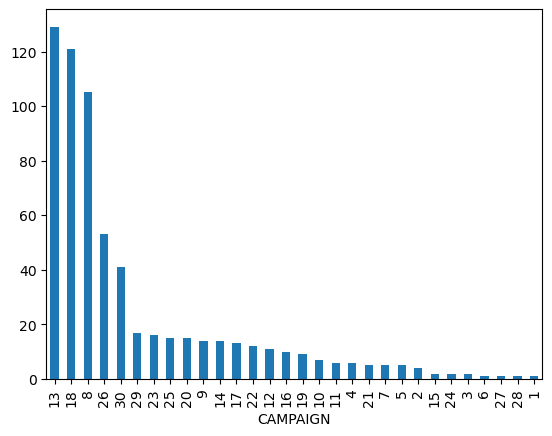

In [82]:
COUPON_REDEMPT_RAW.groupby('CAMPAIGN')['COUPON_UPC'].nunique().sort_values(ascending = False).plot.bar()

In [83]:
coupon_redeem = COUPON_REDEMPT_RAW.groupby('CAMPAIGN').aggregate(total_coupon_redeem = ('COUPON_UPC', 'nunique'))

In [84]:
coupon_redeem.sort_values(by = 'total_coupon_redeem', ascending = False)

,total_coupon_redeem
CAMPAIGN,
13,129
18,121
8,105
26,53
30,41
29,17
23,16
25,15
20,15


In [85]:
coupon_redeem = coupon_redeem.merge(right = coupon_given, on = 'CAMPAIGN', how = 'left')

In [86]:
coupon_redeem.head(10)

,CAMPAIGN,total_coupon_redeem,TOTAL_PRODUCT,TOATL_COUPN_GIVEN,DESCRIPTION,START_DAY,END_DAY,Start_Date,End_Date,CAMPAIGN_DURATION,Start_month,End_month,Start_year,End_year
0,1,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,01,20,21
1,2,4,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,01,20,21
2,3,2,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,02,20,21
3,4,6,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,01,02,21,21
4,5,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,01,02,21,21
5,6,1,18,1,TypeC,393,425,2021-01-28,2021-03-01,32,01,03,21,21
6,7,5,259,8,TypeB,398,432,2021-02-02,2021-03-08,34,02,03,21,21
7,8,105,17178,209,TypeA,412,460,2021-02-16,2021-04-05,48,02,04,21,21
8,9,14,825,18,TypeB,435,467,2021-03-11,2021-04-12,32,03,04,21,21
9,10,7,393,14,TypeB,463,495,2021-04-08,2021-05-10,32,04,05,21,21


In [87]:
coupon_redeem['coupon_redeem_rate'] = (coupon_redeem['total_coupon_redeem']/coupon_redeem['TOATL_COUPN_GIVEN']) * 100

In [88]:
coupon_redeem.sort_values(by = 'coupon_redeem_rate', ascending = False).head()

,CAMPAIGN,total_coupon_redeem,TOTAL_PRODUCT,TOATL_COUPN_GIVEN,DESCRIPTION,START_DAY,END_DAY,Start_Date,End_Date,CAMPAIGN_DURATION,Start_month,End_month,Start_year,End_year,coupon_redeem_rate
23,24,2,1887,2,TypeB,659,719,2021-10-21,2021-12-20,60,10,12,21,21,100.000000
5,6,1,18,1,TypeC,393,425,2021-01-28,2021-03-01,32,01,03,21,21,100.000000
14,15,2,55,2,TypeC,547,708,2021-07-01,2021-12-09,161,07,12,21,21,100.000000
22,23,16,767,18,TypeB,646,684,2021-10-08,2021-11-15,38,10,11,21,21,88.888889
24,25,15,826,17,TypeB,659,691,2021-10-21,2021-11-22,32,10,11,21,21,88.235294


<Axes: xlabel='CAMPAIGN', ylabel='coupon_redeem_rate'>

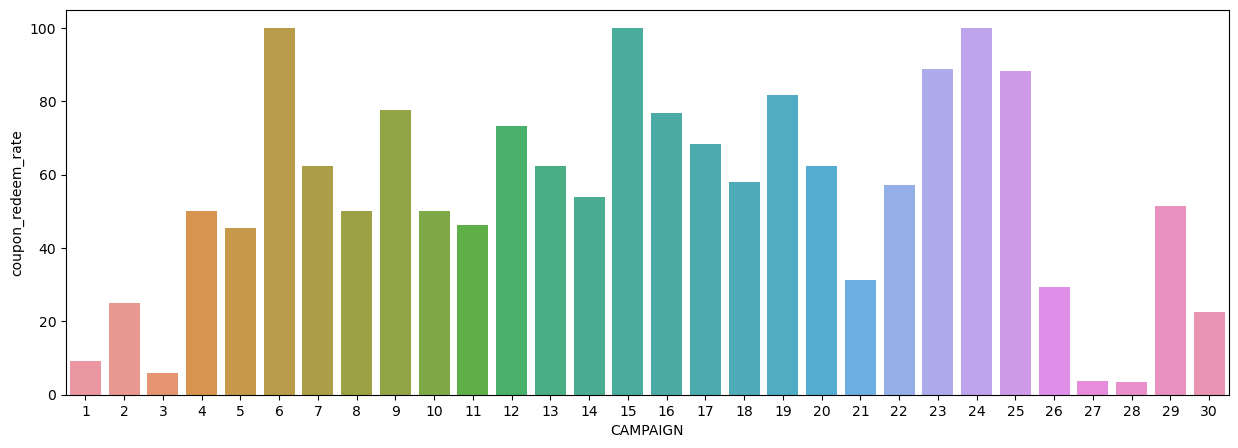

In [89]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'CAMPAIGN', y = 'coupon_redeem_rate', data = coupon_redeem)

In [90]:
TRANSACTION_RAW.columns

Index(['HOUSEHOLD_KEY', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'DATE'],
      dtype='object')

In [91]:
trnx_bucket = TRANSACTION_RAW.groupby('BASKET_ID').agg({'SALES_VALUE':'sum', 'COUPON_DISC': 'sum', 'COUPON_MATCH_DISC': 'sum'})

In [92]:
trnx_bucket.head()

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC
BASKET_ID,,,
26984851472,5.91,0,0
26984851516,12.43,0,0
26984896261,11.37,0,0
26984905972,2.55,0,0
26984945254,3.53,0,0


In [93]:
trnx_bucket['use_coupon'] = trnx_bucket['COUPON_DISC']!=0

In [94]:
trnx_bucket['use_coupon'].value_counts()

False    47892
True      2587
Name: use_coupon, dtype: int64

In [95]:
trnx_bucket.head()

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC,use_coupon
BASKET_ID,,,,
26984851472,5.91,0,0,False
26984851516,12.43,0,0,False
26984896261,11.37,0,0,False
26984905972,2.55,0,0,False
26984945254,3.53,0,0,False


In [96]:
round(trnx_bucket['SALES_VALUE'].mean(),2)

26.93

<Axes: xlabel='SALES_VALUE'>

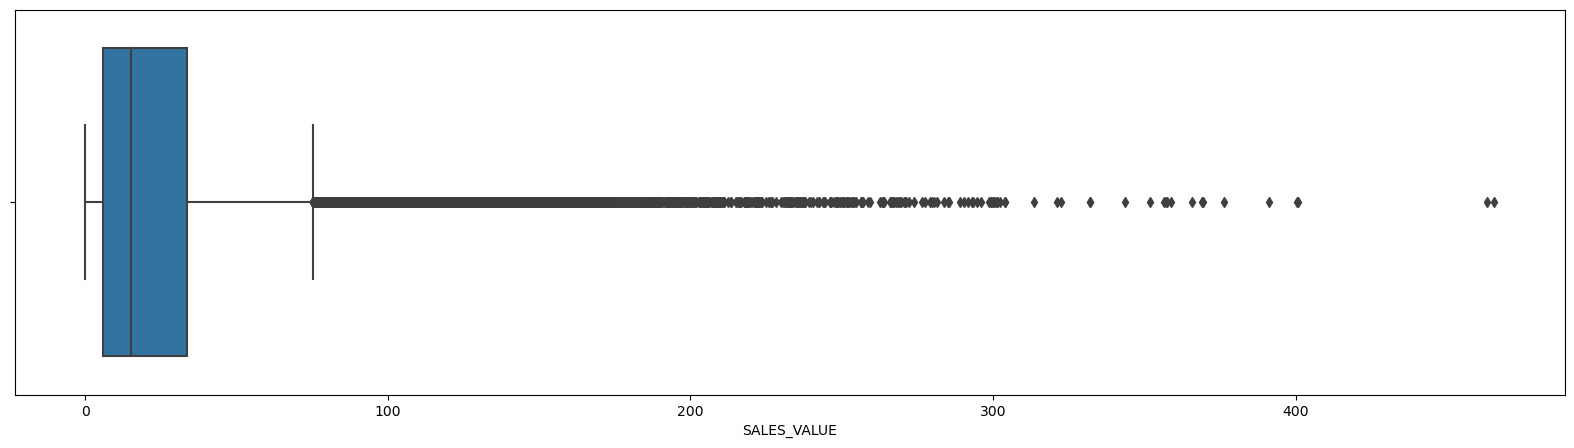

In [97]:
plt.figure(figsize = (20,5))
sns.boxplot(x = trnx_bucket['SALES_VALUE'])

In [98]:
trnx_bucket.groupby('use_coupon').agg(sales_mean = ('SALES_VALUE', 'mean'),
                                     COUPON_DISC_MEAN = ('COUPON_DISC', 'mean'),
                                     COUPON_MATCH_DISC_MEAN = ('COUPON_MATCH_DISC', 'mean'))

,sales_mean,COUPON_DISC_MEAN,COUPON_MATCH_DISC_MEAN
use_coupon,,,
False,25.009980,0.000000,0.000000
True,62.533348,-2.587167,-0.334364


Average basket value with coupon is 62.53
<br>
Average basket value without coupon is 25

In [99]:
TRANSACTION_RAW.columns

Index(['HOUSEHOLD_KEY', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'DATE'],
      dtype='object')

In [100]:
trnx_bucket.columns

Index(['SALES_VALUE', 'COUPON_DISC', 'COUPON_MATCH_DISC', 'use_coupon'], dtype='object')

In [101]:
trnx_desc = TRANSACTION_RAW.merge(right = trnx_bucket, on = 'BASKET_ID', how = 'left')

In [102]:
trnx_desc.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC_x,COUPON_MATCH_DISC_x,DATE,SALES_VALUE_y,COUPON_DISC_y,COUPON_MATCH_DISC_y,use_coupon
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2020-01-02,5.91,0,0,False
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2020-01-02,5.91,0,0,False
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2020-01-02,5.91,0,0,False
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2020-01-02,5.91,0,0,False
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2020-01-02,5.91,0,0,False


In [103]:
trnx_desc = trnx_desc.merge(right = PRODUCT_RAW, on = 'PRODUCT_ID', how = 'left')

In [104]:
trnx_desc.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,SALES_VALUE_y,COUPON_DISC_y,COUPON_MATCH_DISC_y,use_coupon,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,...,5.91,0,0,False,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,...,5.91,0,0,False,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,...,5.91,0,0,False,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,...,5.91,0,0,False,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,...,5.91,0,0,False,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB


In [105]:
trnx_desc.drop(['SALES_VALUE_y', 'COUPON_DISC_y', 'COUPON_MATCH_DISC_y'], axis = 1, inplace = True)

In [106]:
trnx_desc.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC_x,COUPON_MATCH_DISC_x,DATE,use_coupon,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2020-01-02,False,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2020-01-02,False,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2020-01-02,False,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2020-01-02,False,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2020-01-02,False,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB


In [107]:
commodity_coupon = trnx_desc.groupby('COMMODITY_DESC').agg(total_quantity = ('QUANTITY', 'count'),
                                                        use_coupon = ('use_coupon', 'sum'),
                                                        coupon = ('COUPON_DISC_x', 'sum'))

In [108]:
commodity_coupon.head(10)

,total_quantity,use_coupon,coupon
COMMODITY_DESC,,,
,1303,872,-1396
(CORP USE ONLY),12,0,0
ADULT INCONTINENCE,74,3,-1
AIR CARE,928,193,-124
ANALGESICS,681,89,-3
ANTACIDS,307,36,-7
APPAREL,138,11,0
APPLES,2001,287,0
AUDIO/VIDEO PRODUCTS,149,16,-40


In [109]:
commodity_coupon['coupon_redem_rate'] = round((commodity_coupon['use_coupon']/commodity_coupon['total_quantity'])*100,2)

In [110]:
commodity_coupon.sort_values(by = 'use_coupon', ascending = False)

,total_quantity,use_coupon,coupon,coupon_redem_rate
COMMODITY_DESC,,,,
SOFT DRINKS,22020,2623,-1324,11.91
BAKED BREAD/BUNS/ROLLS,14999,1687,-66,11.25
CHEESE,12202,1642,-54,13.46
FLUID MILK PRODUCTS,14462,1455,-51,10.06
BAG SNACKS,11974,1349,-17,11.27
...,...,...,...,...
PROD SUPPLIES,10,0,0,0.00
QUICK SERVICE,22,0,0,0.00
RESTRICTED DIET,5,0,0,0.00


Coupons are mostly used on drinks, bakery product, dairy product

In [111]:
TRANSACTION_RAW.groupby(['HOUSEHOLD_KEY', 'WEEK_NO']).agg({'SALES_VALUE':'sum', 'RETAIL_DISC':'sum', 'COUPON_DISC':'sum', 'COUPON_MATCH_DISC':'sum'})

SALES_VALUE  RETAIL_DISC  COUPON_DISC  \
HOUSEHOLD_KEY WEEK_NO                                          
1             8              78.66       -16.54           -1   
              10             41.10        -8.59            0   
              13             26.90        -6.72            0   
              14             63.43       -11.08           -2   
              15             53.45       -16.42            0   
...                            ...          ...          ...   
2500          17             25.57        -2.41            0   
              20            152.16       -43.73           -6   
              21            113.64        -7.97           -3   
              22             55.03        -2.17            0   
              26            141.15       -51.56           -3   

                       COUPON_MATCH_DISC  
HOUSEHOLD_KEY WEEK_NO                     
1             8                        0  
              10                       0  
              13                       0  
              14                      -1  
              15                       0  
...                                  ...  
2500          17                       0  
              20                       0  
              21                       0  
              22                       0  
              26                       0  

[22823 rows x 4 columns]

In [112]:
TRANSACTION_RAW.groupby(TRANSACTION_RAW['DATE'].dt.year).agg({'SALES_VALUE':'sum', 'RETAIL_DISC':'sum', 'COUPON_DISC':'sum'})

,SALES_VALUE,RETAIL_DISC,COUPON_DISC
DATE,,,
2020,1359551.73,-248978.11,-6693


Sales value increases as retail discount and coupon discount increases

**Droping the Columns**

In [113]:
from datetime import datetime

In [114]:
CAMPAIGN_DESC_RAW.drop(['START_DAY', 'END_DAY'], axis = 1, inplace = True)

In [115]:
CAMPAIGN_DESC_RAW.columns

Index(['DESCRIPTION', 'CAMPAIGN', 'Start_Date', 'End_Date',
       'CAMPAIGN_DURATION', 'Start_month', 'End_month', 'Start_year',
       'End_year'],
      dtype='object')

In [137]:
CAMPAIGN_DESC_RAW['Start_Date'] = pd.to_datetime(CAMPAIGN_DESC_RAW['Start_Date']).dt.date

In [139]:
CAMPAIGN_DESC_RAW['End_Date'] = pd.to_datetime(CAMPAIGN_DESC_RAW['End_Date']).dt.date

In [140]:
COUPON_REDEMPT_RAW['DATE'] = pd.to_datetime(COUPON_REDEMPT_RAW['DATE']).dt.date

In [141]:
TRANSACTION_RAW['DATE'] = pd.to_datetime(TRANSACTION_RAW['DATE']).dt.date

In [142]:
CAMPAIGN_DESC_RAW.dtypes

DESCRIPTION          object
CAMPAIGN               int8
Start_Date           object
End_Date             object
CAMPAIGN_DURATION     int16
Start_month          object
End_month            object
Start_year           object
End_year             object
dtype: object

In [148]:
COUPON_REDEMPT_RAW.drop(['DAY'], axis = 1, inplace = True)

In [153]:
TRANSACTION_RAW.drop(['DAY', 'WEEK_NO'], axis = 1, inplace = True)

**Loading Table to DB**

In [120]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import snowflake.connector as sbowctx
from snowflake.connector.pandas_tools import write_pandas
import pandas as pd
import getpass

In [121]:
conn = snowflake.connector.connect(
       user = 'TARUSHI',
       password = getpass.getpass('Your Snowflake Password: '),
       account = 'novuzjq-sr93796',
       database = 'RETAILS',
       schema = 'PUBLIC',
       warehouse = 'COMPUTE_WH')

Your Snowflake Password: ········


In [122]:
cur = conn.cursor()

In [123]:
cur.execute(''' CREATE OR REPLACE TABLE COUPON_REDEMPT_NEW
(HOUSEHOLD_KEY NUMBER(38,0),
COUPON_UPC NUMBER(38,0),
CAMPAIGN NUMBER(38,0),
Date Date
)''')

In [151]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,DATE
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2020-01-02
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2020-01-02
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2020-01-02
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2020-01-02
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2020-01-02


In [124]:
cur.execute('''CREATE OR REPLACE TABLE TRANSACTION_NEW
(HOUSEHOLD_KEY NUMBER(38,0),
BASKET_ID NUMBER(38,0),
PRODUCT_ID NUMBER(38,0),
QUANTITY NUMBER(38,0),
SALES_VALUE FLOAT,
STORE_ID NUMBER(38,0),
RETAIL_DISC FLOAT,
TRANS_TIME NUMBER(38,0),
COUPON_DISC FLOAT,
COUPON_MATCH_DISC FLOAT,
Date Date
)
''')

In [127]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,Start_Date,End_Date,CAMPAIGN_DURATION,Start_month,End_month,Start_year,End_year
0,TypeB,24,2021-10-21,2021-12-20,60,10,12,21,21
1,TypeC,15,2021-07-01,2021-12-09,161,07,12,21,21
2,TypeB,25,2021-10-21,2021-11-22,32,10,11,21,21
3,TypeC,20,2021-09-07,2021-11-16,70,09,11,21,21
4,TypeB,23,2021-10-08,2021-11-15,38,10,11,21,21


In [128]:
cur.execute('''
CREATE OR REPLACE TABLE CAMPAIGN_DESC_NEW
(DESCRIPTION VARCHAR(10),
CAMPAIGN NUMBER(38,0),
Start_date date,
End_date  date,
Campaign_Duration NUMBER(38,0),
Start_month VARCHAR(10),
End_month VARCHAR(10),
Start_Year INT,
End_Year INT)''')

In [143]:
success, nchunks, nrows, _ = write_pandas(conn, CAMPAIGN_DESC_RAW,'CAMPAIGN_DESC_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,30


In [149]:
success, nchunks, nrows, _ = write_pandas(conn, COUPON_REDEMPT_RAW,'COUPON_REDEMPT_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,2318


In [154]:
success, nchunks, nrows, _ = write_pandas(conn,TRANSACTION_RAW ,'TRANSACTION_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,450416


In [155]:
cur.close()
conn.close()